# Process
1. Prepped bouy data by getting just the period and amplitude for each sample.  This data is saved as period_amp.csv
2. Import prepped data and create a wave object for each sampled wave using wave_model.py (included as python file)
3. Use model to simulate horizontal v, vertical v and pressure at 74 meters below surface
4. Write all data to new file: wave_out.csv
5. Read wave_out.csv and visualize each sampled wave as a series
6. Read wave_out.csv and visualize the relationship between wave period and each simulated wave property

In [1]:
import numpy as np
import wave_model as wm
import matplotlib.pyplot as plt

Read in prepped data:

In [2]:
waves_in = np.loadtxt('data/period_amp.csv',delimiter=',')

Use wave model to simulate additional wave properties for each wave sampled and save results to new file:

In [3]:
#new array: measured_period,measured_amp,horiz,vert,pressure
depth = 75
calculated_wave = []
wave_out = open('data/wave_out.csv','w')
for w in waves_in:
    #solve wave and get some basic properties
    my_wave = wm.wave_solver(w[0],depth,w[1])
    wave_row = w

    #get velocities and pressure at different heights
    wave_row = np.append(wave_row,my_wave.horizontal_velocity(-74))    
    wave_row = np.append(wave_row,my_wave.vertical_velocity(-74))    
    wave_row = np.append(wave_row,my_wave.wave_pressure(-74))
    
    #write to array
    write_line = ",".join(map(str, wave_row))
    wave_out.write(write_line+'\n')
    calculated_wave.append(wave_row)
    
#save to new file
wave_out.close()

Read in simulated data and transpose for visualization.  Create measurments array as an index of data:

In [4]:
read_waves = np.loadtxt('data/wave_out.csv',delimiter=',',usecols = (0,2,3,4))
read_waves = read_waves.transpose()

import array
measurements = []
for i in range(0,len(read_waves[0])):
    measurements.append(i)

Plot data as a series to see the simulated properties of each wave sample:

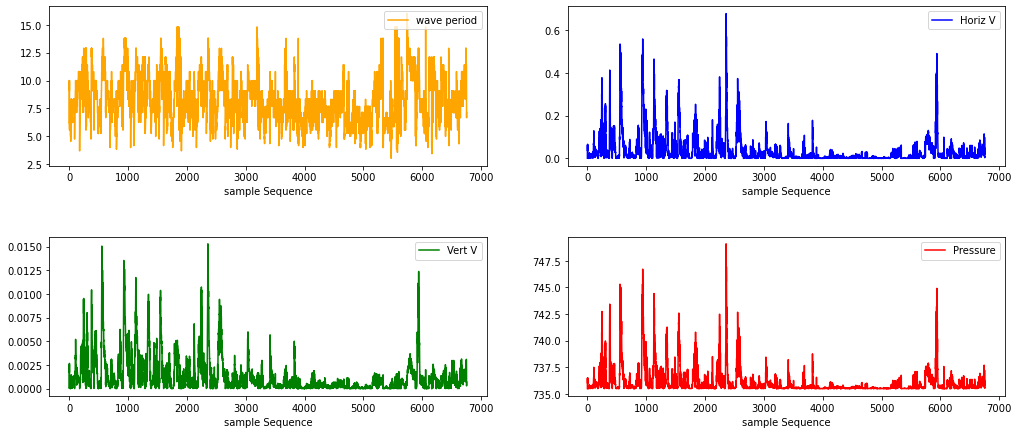

In [6]:
fig, ((axs1,ax2),(axs3,ax4)) = plt.subplots(2, 2,figsize=(14, 6))
fig.tight_layout(h_pad=5,w_pad=5)

titles =["Velocity of surface waves at 1 meter above -75 Bottom"]
colors = ["orange","blue","green","red"]
labels=["wave period","Horiz V","Vert V","Pressure"]
    
i=0
for axs in fig.get_axes():
    axs.plot(measurements,read_waves[i],color=colors[i],label=labels[i])
    axs.set(xlabel="sample Sequence", ylabel="")
    axs.autoscale()
    axs.legend(loc='upper right')
    i+=1
    
plt.show()

Plot the simulated properties in relationship with the measured wave period to compare the degree to which the properties are predicted by period vs amplitude.   (The wave period to wave period chart is included only as a sanity check): 

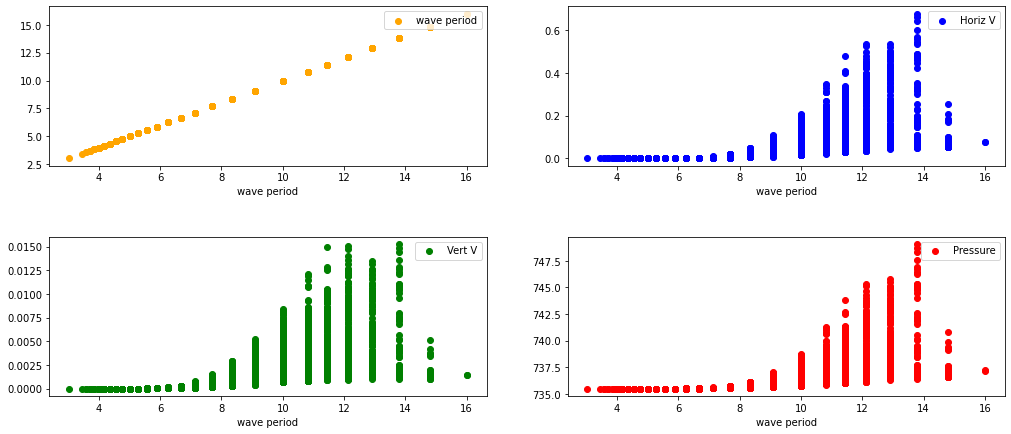

In [7]:
             
fig, ((axs1,ax2),(axs3,ax4)) = plt.subplots(2, 2,figsize=(14, 6))
fig.tight_layout(h_pad=5,w_pad=5)

titles =["Velocity of surface waves at 1 meter above -75 Bottom"]
colors = ["orange","blue","green","red"]
labels=["wave period","Horiz V","Vert V","Pressure"]
    
i=0
for axs in fig.get_axes():
    axs.scatter(read_waves[0],read_waves[i],color=colors[i],label=labels[i])
    axs.set(xlabel="wave period", ylabel="")
    #axs.set_ylim(0, 1)
    #axs.set_xlim(1, 80)
    axs.autoscale()
    axs.legend(loc='upper right')
    i+=1
    
plt.show()

# Conclusions

The results generally match expectations in that the velocities are very low at one meter above the bottom.  In particular the vertical velocity would be very difficult to measure at that depth.  the variation in the pressure due to wave action is a tiny percentage of the overall pressure so measured pressure is overwhelmingly hydrostatic.

The plots showing the relationship between simulated properties and wave period is helpful because it confirms that the velocities and wave induced pressures are resulting from the wave period and the wave amplitude -- what I would expect to see.